<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<hr>
<h2><center>Метрические методы, KNN</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider

# Гипотеза компактности

Метрические методы классификации - одни из самых простых моделей. Они основаны на гипотезе компактности - близким объектам соответствуют близкие ответы.


<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png' width=400></center>

<center><img src='http://ichef-1.bbci.co.uk/news/624/cpsprodpb/13ED9/production/_87552618_fourupcomp.jpg' width=500></center>

* Объекты: Семьи, индивиды
* Признаки: Адрес проживания, почтовый индекс, популярный супермаркет... $\rightarrow$ координаты `(lat, lon)`
* Предскание: Раса (классификация)

<center><img src='img\california_house.png' width=500></center>

* Объекты: Недвижимость
* Признаки: Адрес дома... $\rightarrow$ координаты `(lat, lon)`
* Предсказание: Стоимость дома (регрессия)

<center><img src='img\dna_seq.png' width=900></center>
* Объекты: Строки
* Признаки: ??
* Предсказание: Функциональность гена (класс)

<hr>
<center><img src='img\text_classify.png' width=600></center>
* Объекты: Тексты статей, постов блогов
* Признаки: Частоты слов
* Предсказание: Категория текста (класс)

# Меры близости

* Как определить похожие объекты?

* Необходимо ввести функцию расстояния (не обязательно метрику)

### Самые популярные

$$ d(a, b) = \sum\limits_{i=1}^{D}(a_i - b_i)^2 \text{: euclidean distance} $$

$$ d(a, b) = \sum\limits_{i=1}^{D}|a_i - b_i| \text{: manhattan distance} $$

$$ d(a, b) = 1 - \frac{\langle a,b \rangle}{||a||_2\cdot||b||_2} \text{: cosine distance} $$



### Близость на строках
* Расстояние Левинштейна
Количество вставок, замен и удалений, которое необходимо сделать, чтобы получить из строки $S_1$ строку $S_2$

<center><img src='img\levinstein_dist.png' width=400></center>

### Близость на временных рядах
* Если они одинаковой длинны, то подойдет и евклид
* Если нет - [Dynamic Time Warping](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D1%88%D0%BA%D0%B0%D0%BB%D1%8B)

### Близость на множествах
* Пусть объект описываеться набором категорий, слов, тегов
    * Клиент a: {Картофель фри, биг-мак, кофе, маффин}
    * Клиент b: {Картофель фри, сырный соус, чизбургер, кофе, пирожок}
* Расстояние Жаккара - Jaccard distance:
    * $$d(a,b) = 1 - \frac{|a \cap b|}{|a \cup b|}$$
    * $$d(a,b) = 1 - \frac{2}{7} = \frac{5}{7} $$
* При правильном представлении данных, можно считать и косинус

# Метод k ближайших соседей

Вход: Обучающая выборка $X=(x_i,y_i)$, мера близости $d(\cdot, \cdot)$ и объект $\tilde{x}$<br/>

Найти $k$ ближайших объекта в $X$ c помощью $d(\tilde{x},\cdot)$ 
* (классификация) вернуть наиболее частую метку класса $$\hat{y} = \arg \max\limits_{y \in \{-1, 1\}}\sum\limits_{j=1}^k [y_{(j)} == y] $$


#### Начинаем щупать kNN и sklearn!

Попробуем kNN на игрушечном датасете

In [2]:
from sklearn.datasets import make_moons

plt.style.use('ggplot')

%matplotlib inline

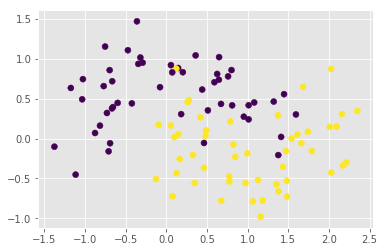

In [3]:
X, y = make_moons(noise=0.3, random_state=123)
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(X, y)

d:\IDE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [5]:
y_hat = knn.predict(X)

In [6]:
y_hat_proba = knn.predict_proba(X)
y_hat_proba.shape

(100, 2)

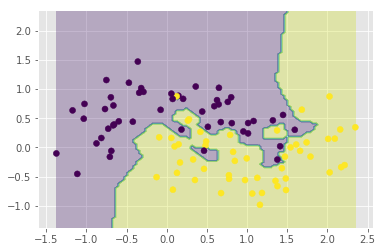

In [12]:
x_range = np.linspace(X.min(), X.max(), 100)
# ОДЗ значений признаков

xx1, xx2 = np.meshgrid(x_range, x_range)
# всевозможные попарные значения признаков

Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
Y = Y.reshape(xx1.shape)

plt.contourf(xx1, xx2, Y, alpha=0.3)
plt.scatter(X[:,0], X[:,1],c=y)

Проблема - никак не учитывается важность соседей в зависимости от их близости!

## Взвешенный KNN

* (регрессия) вернуть среднее взвешенное значение* $$\hat{y} = \frac{\sum\limits_{j=1}^k w_{(j)} y_{(j)}}{\sum\limits_{j=1}^k w_{(j)}}$$
* (классификация) вернуть наиболее частую метку класса c учетом веса $$\hat{y} = \arg \max\limits_{y \in \{-1, 1\}}\sum\limits_{j=1}^k w_{(j)} [y_{(j)} == y] $$

### Варианты весов
* $w_{(j)} = \frac{k - j + 1}{k}$
* $w_{(j)} = 1/d(\tilde{x},x_{(j)})$
* $w_{(j)} = K(\frac{d(\tilde{x},x_{(j)})}{h}) $
    * $K$ - ядро, $h$ - ширина окна


### Ядра
* $K(d, h) \propto \exp(- \frac{d^2}{2h^2})$ - gaussian kernel
* $K(d, h) \propto 1 if x < d$ - tophat kernel
* $K(d, h) \propto 1 - \frac{d^2}{h^2}$ - epanechnikov kernel
* $K(d, h) \propto \exp(-d/h)$ - exponential kernel
* $K(d, h) \propto 1 - d/h if d < h$ - linear kernel
* $K(d, h) \propto \cos(\frac{\pi d}{2h}) if x < h$ - linear kernel

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_0021.png'></center>

In [13]:
def plot_knn_class_kernel(k=1, prob=False, use_dist=False):
        
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    if use_dist:
        knn = KNeighborsClassifier(n_neighbors=70, metric='minkowski', p=2, weights='distance')
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2, weights='uniform')
    knn.fit(X, y)
    
    x_range = np.linspace(X.min(), X.max(), 500)
    # ОДЗ значений признаков

    xx1, xx2 = np.meshgrid(x_range, x_range)
    # всевозможные попарные значения признаков
    if prob:
        Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
    else:
        Y = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    
    plt.show()

In [14]:
fig = interact(plot_knn_class_kernel, k=IntSlider(min=1, max=10, value=1))

interactive(children=(IntSlider(value=1, description='k', max=10, min=1), Checkbox(value=False, description='prob'), Checkbox(value=False, description='use_dist'), Output()), _dom_classes=('widget-interact',))

# Параметры vs Гиперпараметры

При работе с моделями следует различать понятия **Параметр** и **Гипер-параметр**.

* **Параметр** - составляющая модели, которая определяется в процессе обучения (решения оптимизационной задачи)
    * Веса коэффициентов в модели линейной регрессии
* **Гиперпараметр** - составляющая модели, которая задается перед началом обучения. Может регулировать некоторые свойства модели (скорость оптимизации) или ее сложность
    * Коэффициент регуляризации в линейной регрессии
    
Как дела обстоят у kNN?


#### Гиперпараметры kNN

* Число соседей
* Функция расстояния
* Ядро, ширина окна

# Данные с оттоком клиентов

Загрузите данные об оттоке клиентов через pandas.

In [15]:
df_churn = pd.read_csv('data/churn.csv')

In [16]:
df_churn.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account Length,128,107,137,84,75
Area Code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
Int'l Plan,no,no,no,yes,yes
VMail Plan,yes,yes,no,no,no
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34


In [17]:
print(df_churn.shape)

(3333, 21)


Это небольшие данные, но у них есть большие проблемы:

#### Проблема 1: Признаки разных шкал

In [18]:
df_churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Length,3333,NaN,NaN,NaN,101.065,39.8221,1,74,101,127,243
Area Code,3333,NaN,NaN,NaN,437.182,42.3713,408,408,415,510,510
Phone,3333,3333,395-6149,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Int'l Plan,3333,2,no,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Plan,3333,2,no,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Message,3333,NaN,NaN,NaN,8.09901,13.6884,0,0,0,20,51
Day Mins,3333,NaN,NaN,NaN,179.775,54.4674,0,143.7,179.4,216.4,350.8
Day Calls,3333,NaN,NaN,NaN,100.436,20.0691,0,87,101,114,165
Day Charge,3333,NaN,NaN,NaN,30.5623,9.25943,0,24.43,30.5,36.79,59.64


#### Проблема 2: Региональные признак
Он может влиять на ответ, но развертывать его в бинарный не имеет смысла.

Можно ли его как-то неявно включить в модель?

In [19]:
df_churn.loc[:, 'State'].nunique()

51

In [20]:
df_churn.State.head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

#### Проблема 3: Довольно сильный перекос классов

In [21]:
df_churn.loc[:, 'Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

1. Подготовим данные
    * Удалим ненужные признаки
    * Преобразуем категориальные и бинарные признаки
    * Отнормируем признаки
2. Выберем меру качества и метод оценки обобщающей способности
3. Вновь, зафиксируем все гиперпараметры, кроме количества ближайших соседей, найдем наилучшее значение

In [22]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    # Удалили признаки
    df_preproc = df_preproc.drop(['State', 'Area Code', 'Phone'], axis=1)
    
    # Замена категориальных признаков
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']] = \
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']].replace({'no': 0, 'yes': 1})
    
    df_preproc.loc[:,  'Churn?'] = df_preproc.loc[:,  'Churn?'].replace({'False.': 0,
                                                                         'True.': 1})
    return df_preproc

In [23]:
df_preproc = df_churn.pipe(preproc)

In [24]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123)

In [26]:
# Сделаем пайплайн
# 1) Нормализатор признаков
# 2) kNN

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [28]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [29]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [30]:
y_hat = model.predict(X_test)

In [31]:
y_hat[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
y_hat_proba = model.predict_proba(X_test, )

In [33]:
y_hat_proba[:10]

array([[0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
roc_auc_score(y_test, y_hat_proba[:, 1])

0.8581486332770328

In [36]:
scores_test = []
scores_train = []

for k in range(1, 150):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
    

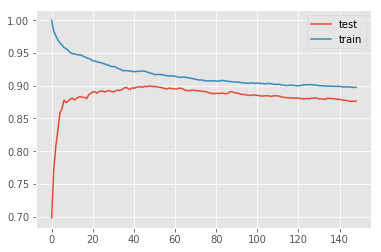

In [37]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()